<a href="https://colab.research.google.com/github/MerlinePricillaPeter/LUNG-CANCER-PREDICTION/blob/main/LUNG_CANCER_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [3]:
import warnings

# to Ignore all warnings
warnings.filterwarnings("ignore")

In [4]:
 #Specifying the file path
data = '/content/survey lung cancer.csv'

#to  Read the CSV file into a DataFrame
df = pd.read_csv(data)

# to Display the first few rows of the dataset
print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [5]:
# Display the column names of the DataFrame
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [6]:
# to find the missing values in the given dataset
print("Data Types and Missing Values:")
print(df.info())

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int6

In [7]:
# Display the shape of the dataset
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Shape:
Rows: 309, Columns: 16


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [9]:
#  Remove duplicates
print("\nDuplicate rows: ", df.duplicated().sum())
dataset = df.drop_duplicates()


Duplicate rows:  33


In [10]:
df = df.drop_duplicates()

In [11]:
# Clean column names by stripping spaces
df.columns = df.columns.str.strip()


In [12]:
# Display the shape of the dataset
print("Dataset Shape after pre-processing:")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Shape after pre-processing:
Rows: 276, Columns: 16


**EXPLORATORY DATA ANALYSIS**

In [13]:
# Checking for unique values in each column
print("\nUnique Values in Each Column:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")


Unique Values in Each Column:
GENDER: ['M' 'F']
AGE: [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
SMOKING: [1 2]
YELLOW_FINGERS: [2 1]
ANXIETY: [2 1]
PEER_PRESSURE: [1 2]
CHRONIC DISEASE: [1 2]
FATIGUE: [2 1]
ALLERGY: [1 2]
WHEEZING: [2 1]
ALCOHOL CONSUMING: [2 1]
COUGHING: [2 1]
SHORTNESS OF BREATH: [2 1]
SWALLOWING DIFFICULTY: [2 1]
CHEST PAIN: [2 1]
LUNG_CANCER: ['YES' 'NO']


In [14]:
print("\nBasic Statistical Summary:")
print(df.describe())


Basic Statistical Summary:
              AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  276.000000  276.000000      276.000000  276.000000     276.000000   
mean    62.909420    1.543478        1.576087    1.496377       1.507246   
std      8.379355    0.499011        0.495075    0.500895       0.500856   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.750000    1.000000        1.000000    1.000000       1.000000   
50%     62.500000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE     FATIGUE     ALLERGY    WHEEZING  ALCOHOL CONSUMING  \
count       276.000000  276.000000  276.000000  276.000000         276.000000   
mean          1.521739    1.663043    1.547101    1.547101           1.550725   
std           0.500435    0.473529    0.4986

In [15]:
# Check and analyze the 'LUNG_CANCER' column
if 'LUNG_CANCER' in df.columns:
    # Count values for healthy and suspected patients
    lung_cancer_counts = df['LUNG_CANCER'].value_counts()

    # Access counts using labels instead of positional indices
    healthy_count = lung_cancer_counts.get('NO', 'Not Available')
    suspected_count = lung_cancer_counts.get('YES', 'Not Available')

    # Print results
    print(f"Total Healthy Patients : {healthy_count}")
    print(f"Total Suspected Patients : {suspected_count}")
else:
    print("Error: 'LUNG_CANCER' column not found in the dataset.")

Total Healthy Patients : 38
Total Suspected Patients : 238


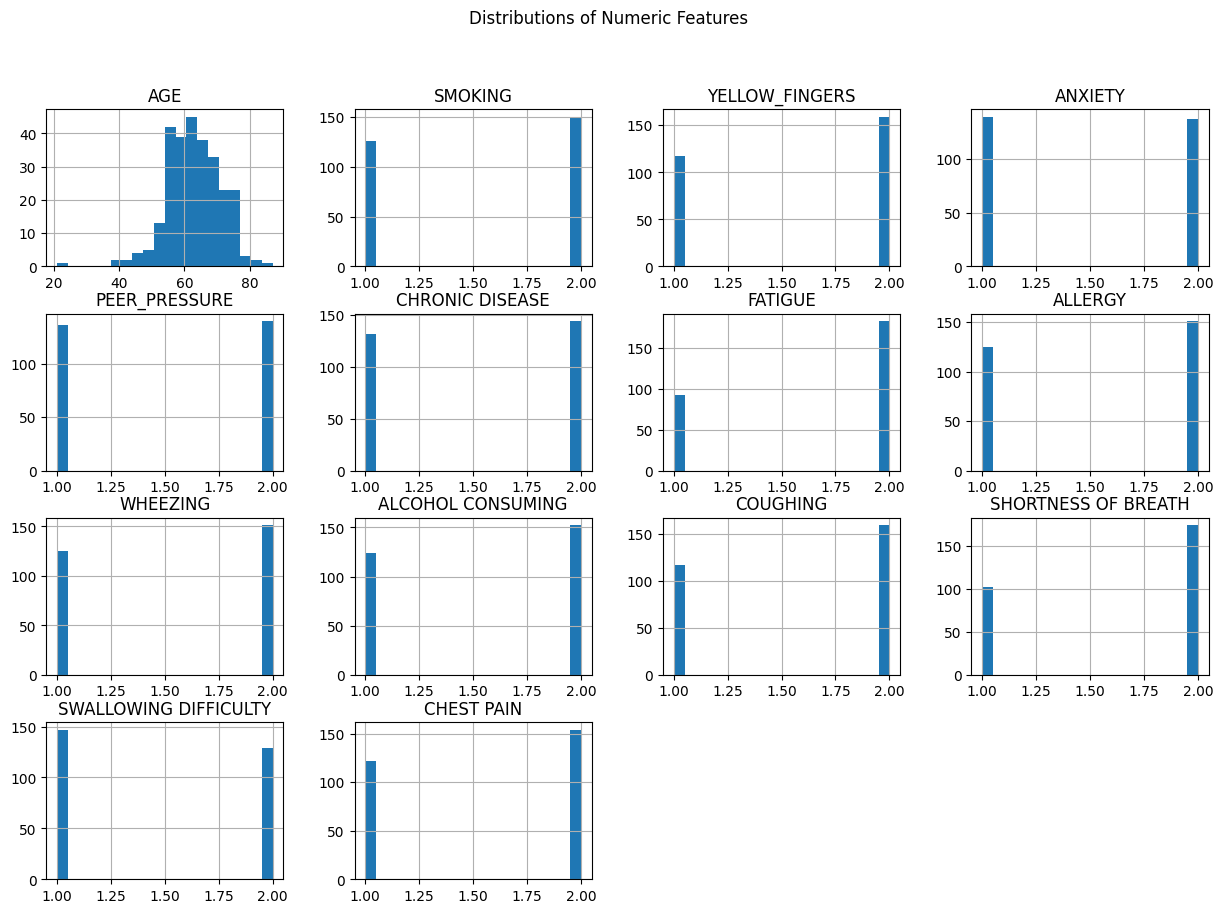

In [16]:
 # Visualizing the distributions of numeric features (where we will be excluding lung cancer as it is a target variable)
numeric_columns = df.select_dtypes(include='number').columns
df[numeric_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Numeric Features")
plt.show()

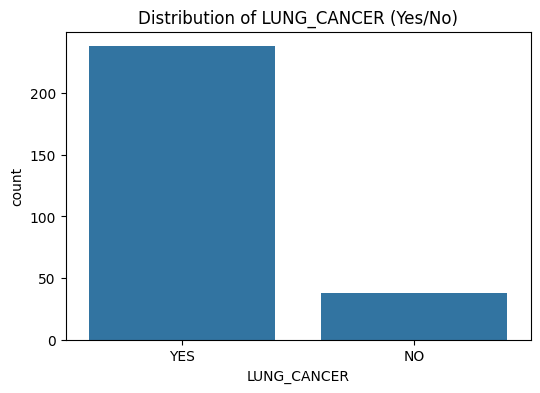

In [17]:
# plotting a graph to check the distribution of the target variable 'LUNG_CANCER'
plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df)  # Make sure to pass 'data' as a parameter
plt.title("Distribution of LUNG_CANCER (Yes/No)")
plt.show()


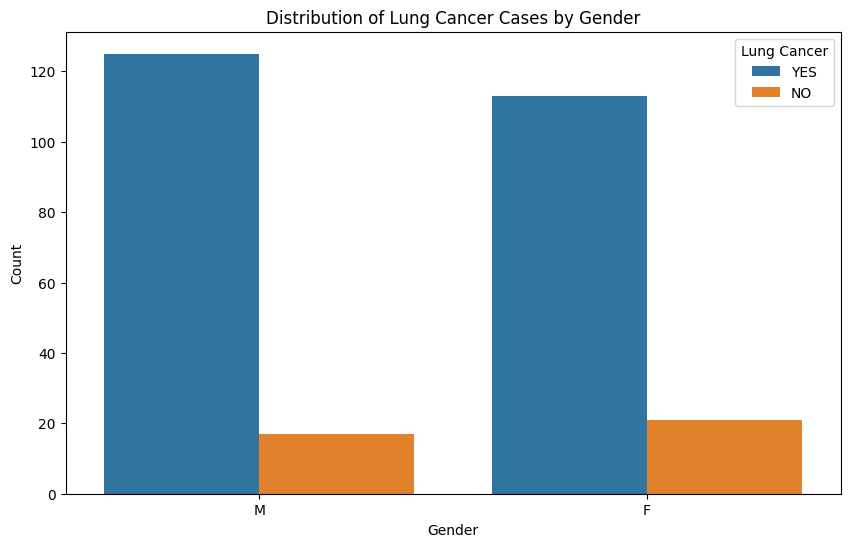

In [18]:
# plotting the Bar chart for gender distribution analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df)
plt.title('Distribution of Lung Cancer Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', loc='upper right')
plt.show()


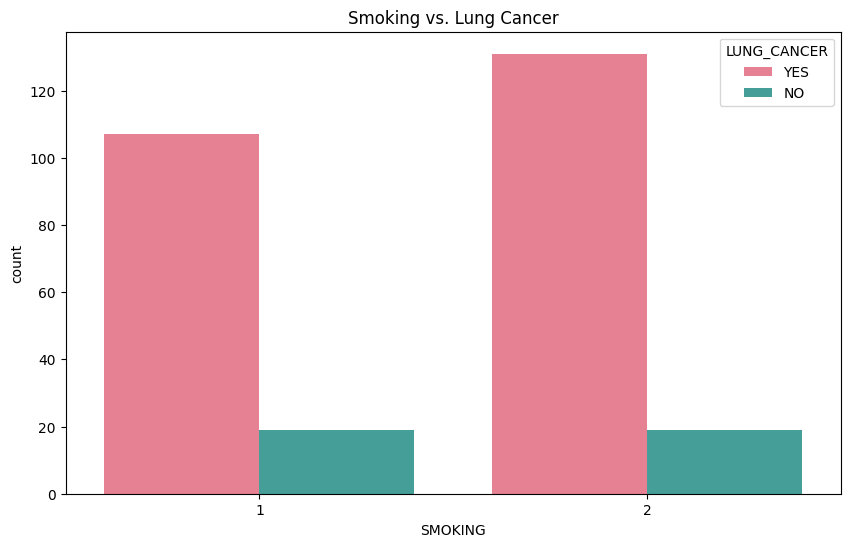

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 8. Smoking vs Lung Cancer Distribution with vibrant colors
plt.figure(figsize=(10, 6))
sns.countplot(x='SMOKING', hue='LUNG_CANCER', data=df, palette="husl")  # Vibrant colors using 'husl' palette
plt.title("Smoking vs. Lung Cancer")
plt.show()

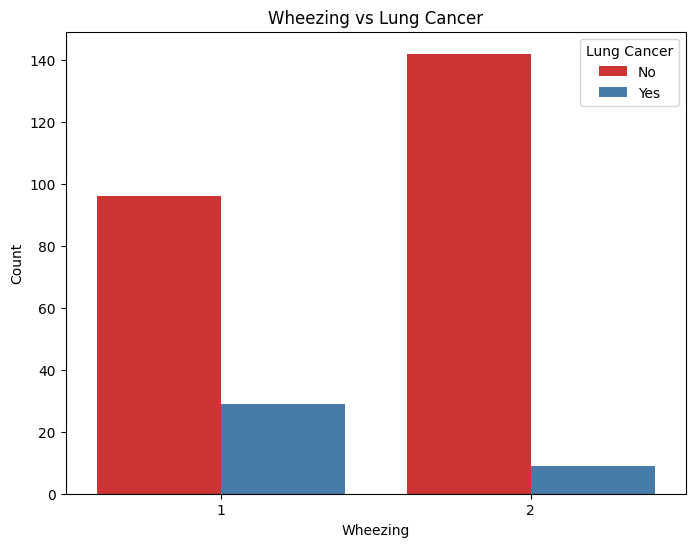

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6. Wheezing vs Lung Cancer Distribution with custom colors
plt.figure(figsize=(8, 6))
sns.countplot(x='WHEEZING', hue='LUNG_CANCER', data=df, palette='Set1')  # You can choose any color palette
plt.title('Wheezing vs Lung Cancer')
plt.xlabel('Wheezing')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()


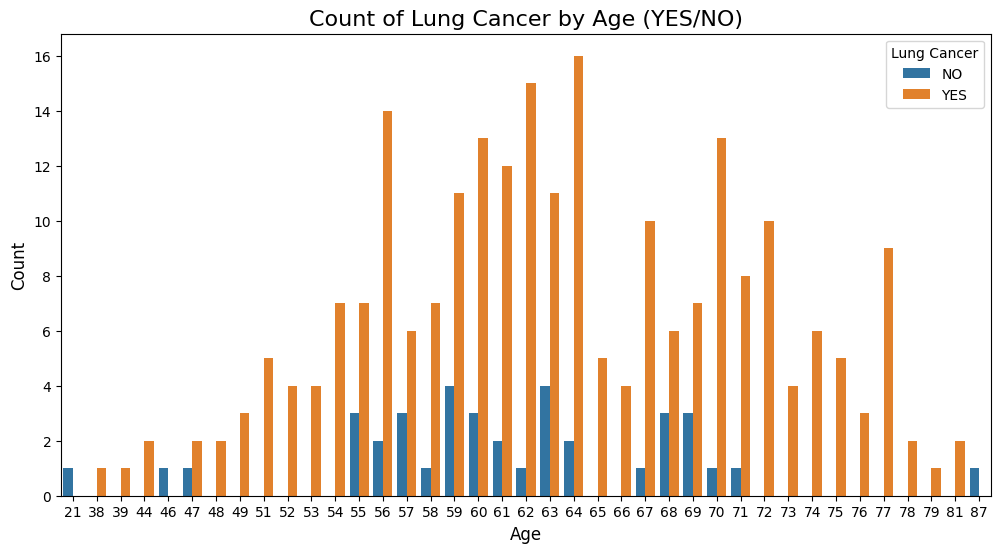

In [21]:
# plotting a Countplot for AGE vs LUNG_CANCER
plt.figure(figsize=(12, 6))
sns.countplot(x='AGE', hue='LUNG_CANCER', data=df)
plt.title('Count of Lung Cancer by Age (YES/NO)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Lung Cancer', labels=['NO', 'YES'])
plt.show()


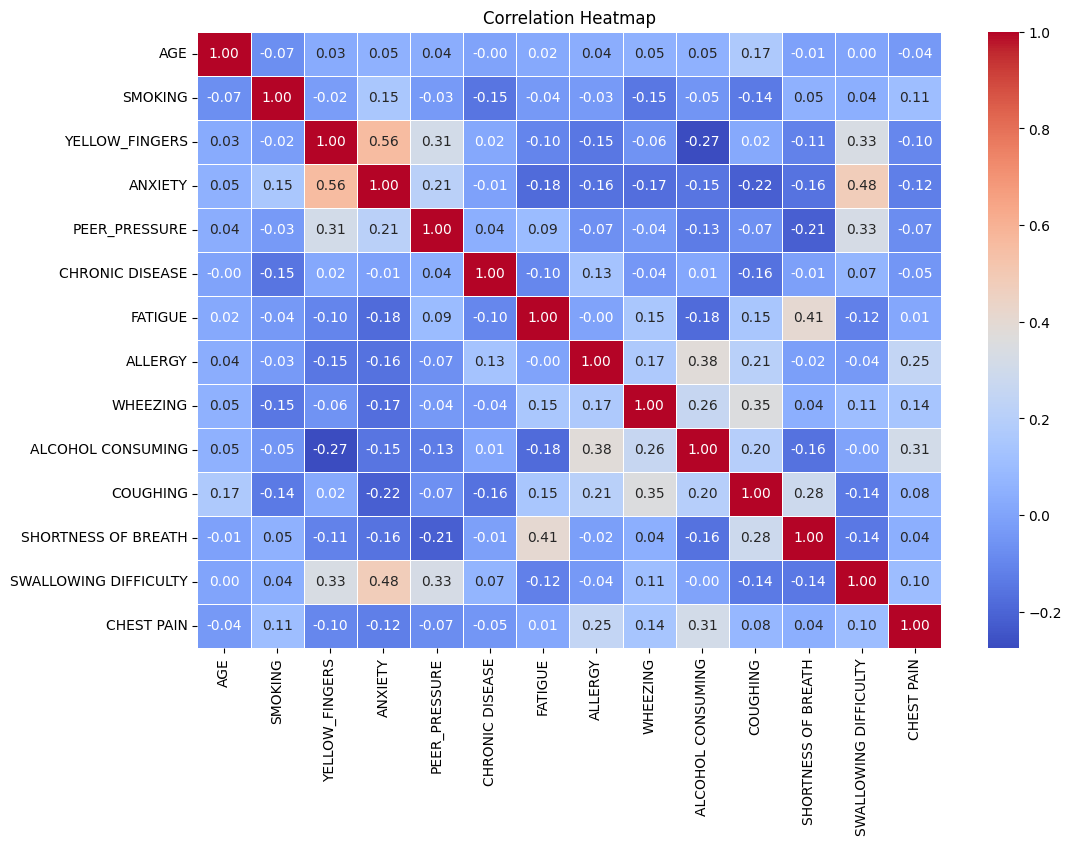

In [22]:
# Visualizing the  correlations between numeric features using a heatmap
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**LABEL ENCODING**

In [23]:
# Encode Categorical Features
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = ['GENDER', 'LUNG_CANCER']

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

print("\nDataset after Encoding:")
print(df.head())


Dataset after Encoding:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2  

**ONE HOT ENCODING**

In [24]:
# One-hot encode other categorical features
df = pd.get_dummies(df, columns=['GENDER'], drop_first=True)

In [25]:
# Features and Target
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']